### Conclusion:
The sampling distribution of point has **nothing** to do with the instance you pass in.

Data is sampled according to standard normal, then rescaled to the original data.

In [18]:
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

import pandas as pd
import numpy as np
import lime
from lime.lime_tabular import LimeTabularExplainer
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingClassifier


boston  = load_boston()
X, feature_names = boston.data, boston.feature_names
X, feature_names = X[:, :2], feature_names[:2]
y = (boston.target > np.percentile(boston.target, 65)).astype(float)

model = GradientBoostingClassifier()
model.fit(X, y)

explanation = LimeTabularExplainer(X, 
                                   feature_names=feature_names,
                                   discretize_continuous = False)

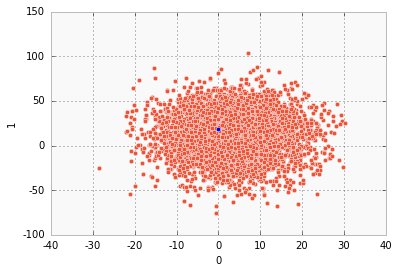

In [40]:
%matplotlib inline
ID = 0
instance = X[ID]
exp, data  = explanation.explain_instance(instance, model.predict_proba, return_data=True)
ax = pd.DataFrame(data['data']).plot(kind = 'scatter', x =0, y = 1)
pd.DataFrame(instance).T.plot(ax=ax, kind = 'scatter', x =0, y = 1, color= 'blue')

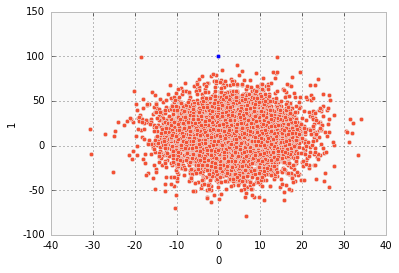

In [39]:
%matplotlib inline
ID = np.argmax(X[:, 1])
instance = X[ID]
exp, data  = explanation.explain_instance(instance, model.predict_proba, return_data=True)
ax = pd.DataFrame(data['data']).plot(kind = 'scatter', x =0, y = 1)
pd.DataFrame(instance).T.plot(ax=ax, kind = 'scatter', x =0, y = 1, color= 'blue')